In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('SBAnational.csv')

df.head()

/tmp/ipykernel_156153/3196009826.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/tmp/ipykernel_156153/3196009826.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [2]:
df.shape

(899164, 27)

In [3]:
df['BalanceGross'].unique()

array(['$0.00 ', '$12,750.00 ', '$827,875.00 ', '$25,000.00 ',
       '$37,100.00 ', '$43,127.00 ', '$84,617.00 ', '$1,760.00 ',
       '$115,820.00 ', '$996,262.00 ', '$395,476.00 ', '$41,509.00 ',
       '$600.00 ', '$9,111.00 ', '$96,908.00 '], dtype=object)

In [4]:
df = df.drop(['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'BankState', 'ApprovalDate', 'ApprovalFY', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'ChgOffPrinGr', 'BalanceGross', 'SBA_Appv'], axis=1)

In [5]:
df.dtypes

State             object
NAICS              int64
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr         object
LowDoc            object
MIS_Status        object
GrAppv            object
dtype: object

In [6]:
display(df.isnull().sum())

df = df.dropna()


display(df.duplicated().sum())
df = df.drop_duplicates(keep=False)
df.shape

State              14
NAICS               0
Term                0
NoEmp               0
NewExist          136
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4528
LowDoc           2582
MIS_Status       1997
GrAppv              0
dtype: int64

17340

(860580, 13)

In [7]:
# TRANSFORMATION DES VALEURS "YES" ET "NO" EN 0 ET 1
df["RevLineCr"] = df["RevLineCr"].replace({"N": 0, "Y" : 1})

df["LowDoc"] = df["LowDoc"].replace({"N": 0, "Y" : 1})


df["GrAppv"] = df["GrAppv"].str.replace("$", "").str.replace(",", "").fillna(0).astype(float).astype(int)




df["MIS_Status"] = df["MIS_Status"].str.replace(" ", "")
df["MIS_Status"] = df["MIS_Status"].replace({"PIF": 0, "CHGOFF" : 1})
df






/tmp/ipykernel_156153/34787344.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MIS_Status"] = df["MIS_Status"].replace({"PIF": 0, "CHGOFF" : 1})


,State,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv
0,IN,451120,84,4,2.0,0,0,1,0,0,1,0,60000
1,IN,722410,60,2,2.0,0,0,1,0,0,1,0,40000
2,IN,621210,180,7,1.0,0,0,1,0,0,0,0,287000
3,OK,0,60,2,1.0,0,0,1,0,0,1,0,35000
4,FL,0,240,14,1.0,7,7,1,0,0,0,0,229000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,OH,451120,60,6,1.0,0,0,1,0,0,0,0,70000
899160,OH,451130,60,6,1.0,0,0,1,0,1,0,0,85000
899161,CA,332321,108,26,1.0,0,0,1,0,0,0,0,300000
899162,HI,0,60,6,1.0,0,0,1,0,0,1,1,75000


In [8]:
df.describe()

,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status,GrAppv
count,860580.000000,860580.000000,860580.000000,860580.000000,860580.000000,860580.000000,860580.000000,860580.000000,860580.000000,8.605800e+05
mean,405232.486639,111.375987,11.640839,1.280402,8.755258,11.183310,2835.727914,0.771332,0.181587,1.964775e+05
std,260367.146337,79.467426,75.266051,0.451832,241.555095,241.993493,12938.375040,0.645731,0.385504,2.858070e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,235930.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.500000e+04
50%,446120.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,9.500000e+04
75%,561990.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.000000,2.340000e+05
max,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.000000,5.000000e+06


In [9]:
sns.boxplot(data=df)
plt.yscale("log")
plt.show()



In [ ]:
# bins = 100

# plt.figure(figsize=(15,15))
# # custom_palette = sns.color_palette("mako", as_cmap=True)
# plt.xlabel("NOMBRE D'INDIVIDUS")
# plt.ylabel("Gross amount approved")
# plt.title("Distribution des données de la variable BMI", fontsize=20)
# sns.histplot(df, bins=bins, y="GrAppv", hue="GrAppv", palette="rocket_r", legend=False)
# plt.show()


In [ ]:
df['MIS_Status'].value_counts()

MIS_Status
0    704310
1    156270
Name: count, dtype: int64

ValueError: 'label' must be of length 'x'

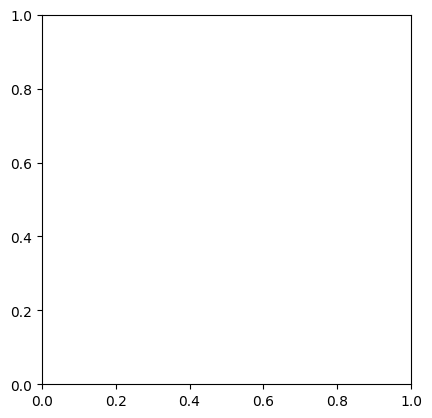

In [ ]:
newexistcounts = df['NewExist'].value_counts()
labels = ["New", "Existing" ]
colors = [""]

plt.pie(newexistcounts, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor':'white'})
plt.title('New or existing workplace')
plt.show()


In [ ]:
#Corrélation entre toutes les colonnes

df.corr(numeric_only=True)

,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status,GrAppv
NAICS,1.000000,-0.116417,-0.041003,0.051052,-0.041283,-0.038715,0.023525,0.419978,0.098328,-0.064099
Term,-0.116417,1.000000,0.045902,-0.073290,0.027547,0.024865,0.027964,-0.209324,-0.321392,0.503119
NoEmp,-0.041003,0.045902,1.000000,-0.040432,0.008513,0.015187,0.005863,-0.044122,-0.027724,0.089515
NewExist,0.051052,-0.073290,-0.040432,1.000000,-0.002165,-0.009228,0.124949,0.034420,0.020196,-0.066534
CreateJob,-0.041283,0.027547,0.008513,-0.002165,1.000000,0.993943,0.000845,-0.031113,0.011478,0.007899
RetainedJob,-0.038715,0.024865,0.015187,-0.009228,0.993943,1.000000,-0.000745,-0.026230,0.011835,0.010345
FranchiseCode,0.023525,0.027964,0.005863,0.124949,0.000845,-0.000745,1.000000,-0.007838,-0.018139,0.066263
UrbanRural,0.419978,-0.209324,-0.044122,0.034420,-0.031113,-0.026230,-0.007838,1.000000,0.152907,-0.064928
MIS_Status,0.098328,-0.321392,-0.027724,0.020196,0.011478,0.011835,-0.018139,0.152907,1.000000,-0.126916
GrAppv,-0.064099,0.503119,0.089515,-0.066534,0.007899,0.010345,0.066263,-0.064928,-0.126916,1.000000


# Est-ce que la SBA émet le prêt ou elle le garantit juste ?

La SBA n'émet généralement pas directement les prêts aux petites entreprises. Au lieu de cela, elle collabore avec des prêteurs approuvés tels que des banques, des coopératives de crédit et d'autres institutions financières.

La SBA offre une garantie aux prêteurs, ce qui signifie qu'elle s'engage à rembourser une partie du prêt en cas de défaut de remboursement par l'emprunteur. Cette garantie rend les prêts moins risqués pour les prêteurs, ce qui encourage ces derniers à prêter aux petites entreprises qui pourraient avoir du mal à obtenir un financement conventionnel.

En résumé, la SBA n'émet pas directement les prêts, mais elle offre des garanties pour faciliter l'accès au crédit aux petites entreprises en travaillant en partenariat avec des prêteurs privés.

# Le prêt est accordé avant ou après la garantie de la SBA ? 

En général, le processus d'octroi d'un prêt SBA suit la séquence suivante :

-Demande de prêt : L'entreprise intéressée soumet une demande de prêt à un prêteur approuvé par la SBA. Ce prêteur peut être une banque, une coopérative de crédit ou une autre institution financière.

-Évaluation par le prêteur : Le prêteur évalue la demande de prêt en fonction de ses propres critères de crédit et de risque. Il peut demander des informations financières détaillées et d'autres documents pour évaluer la viabilité du prêt.

-Garantie SBA : Une fois que le prêteur a décidé d'accorder le prêt, la SBA intervient en fournissant une garantie au prêteur. Cette garantie réduit le risque pour le prêteur, encourageant ainsi le financement des petites entreprises.

-Décision finale du prêteur : Avec la garantie SBA en place, le prêteur prend la décision finale d'accorder le prêt. Si le prêt est approuvé, les termes et conditions spécifiques seront établis, y compris le montant du prêt, le taux d'intérêt, la durée de remboursement, etc.

-Déboursement des fonds : Une fois que toutes les conditions sont remplies, les fonds du prêt sont déboursés à l'entreprise emprunteuse.

En résumé, la garantie de la SBA intervient après que le prêteur a pris la décision d'accorder le prêt. Elle est une mesure de soutien visant à encourager les prêteurs à financer des entreprises qui pourraient présenter un risque plus élevé sans cette garantie.